<a href="https://colab.research.google.com/github/Sourav-Manik/Data-Science-Assignment/blob/main/Assignment_17_SVM_Salary_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# SVM Classification
import pandas as pd
import numpy as np

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [2]:
test_df = pd.read_csv('/content/SalaryData_Test.csv')
train_df = pd.read_csv('/content/SalaryData_Train.csv')
print(test_df.head())
print(train_df.head())

   age   workclass      education  ...  hoursperweek          native  Salary
0   25     Private           11th  ...            40   United-States   <=50K
1   38     Private        HS-grad  ...            50   United-States   <=50K
2   28   Local-gov     Assoc-acdm  ...            40   United-States    >50K
3   44     Private   Some-college  ...            40   United-States    >50K
4   34     Private           10th  ...            30   United-States   <=50K

[5 rows x 14 columns]
   age          workclass   education  ...  hoursperweek          native  Salary
0   39          State-gov   Bachelors  ...            40   United-States   <=50K
1   50   Self-emp-not-inc   Bachelors  ...            13   United-States   <=50K
2   38            Private     HS-grad  ...            40   United-States   <=50K
3   53            Private        11th  ...            40   United-States   <=50K
4   28            Private   Bachelors  ...            40            Cuba   <=50K

[5 rows x 14 columns]


In [3]:
#EDA for test data 

In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [5]:
#Dropping below columns as it is immaterial for dertermination of salary

In [6]:
test_df1=test_df.drop(['education','maritalstatus','relationship','capitalgain','capitalloss'],axis=1)
test_df1.head()

,age,workclass,educationno,occupation,race,sex,hoursperweek,native,Salary
0,25,Private,7,Machine-op-inspct,Black,Male,40,United-States,<=50K
1,38,Private,9,Farming-fishing,White,Male,50,United-States,<=50K
2,28,Local-gov,12,Protective-serv,White,Male,40,United-States,>50K
3,44,Private,10,Machine-op-inspct,Black,Male,40,United-States,>50K
4,34,Private,6,Other-service,White,Male,30,United-States,<=50K


In [7]:
label_encoder = preprocessing.LabelEncoder()
test_df1['workclass']= label_encoder.fit_transform(test_df1['workclass']) 
test_df1['occupation']= label_encoder.fit_transform(test_df1['occupation']) 
test_df1['native']= label_encoder.fit_transform(test_df1['native']) 
test_df1['race']= label_encoder.fit_transform(test_df1['race'])
test_df1['sex']= label_encoder.fit_transform(test_df1['sex'])
test_df1['Salary']= label_encoder.fit_transform(test_df1['Salary']) 
test_df1.head()

,age,workclass,educationno,occupation,race,sex,hoursperweek,native,Salary
0,25,2,7,6,2,1,40,37,0
1,38,2,9,4,4,1,50,37,0
2,28,1,12,10,4,1,40,37,1
3,44,2,10,6,2,1,40,37,1
4,34,2,6,7,4,1,30,37,0


In [8]:
array = test_df1.values
X_test = array[:,0:8]
Y_test = array[:,8]

In [9]:
X_test

array([[25,  2,  7, ...,  1, 40, 37],
       [38,  2,  9, ...,  1, 50, 37],
       [28,  1, 12, ...,  1, 40, 37],
       ...,
       [38,  2, 13, ...,  1, 50, 37],
       [44,  2, 13, ...,  1, 40, 37],
       [35,  3, 13, ...,  1, 60, 37]])

In [10]:
Y_test

array([0, 0, 1, ..., 0, 0, 1])

In [11]:
#EDA for train data 

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [13]:
#Dropping below columns as it is immaterial for dertermination of salary

In [14]:
train_df1=train_df.drop(['education','maritalstatus','relationship','capitalgain','capitalloss'],axis=1)
train_df1.head()

,age,workclass,educationno,occupation,race,sex,hoursperweek,native,Salary
0,39,State-gov,13,Adm-clerical,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Exec-managerial,White,Male,13,United-States,<=50K
2,38,Private,9,Handlers-cleaners,White,Male,40,United-States,<=50K
3,53,Private,7,Handlers-cleaners,Black,Male,40,United-States,<=50K
4,28,Private,13,Prof-specialty,Black,Female,40,Cuba,<=50K


In [15]:
label_encoder = preprocessing.LabelEncoder()
train_df1['workclass']= label_encoder.fit_transform(train_df1['workclass']) 
train_df1['occupation']= label_encoder.fit_transform(train_df1['occupation']) 
train_df1['native']= label_encoder.fit_transform(train_df1['native']) 
train_df1['race']= label_encoder.fit_transform(train_df1['race'])
train_df1['sex']= label_encoder.fit_transform(train_df1['sex'])
train_df1['Salary']= label_encoder.fit_transform(train_df1['Salary']) 
train_df1.head()

,age,workclass,educationno,occupation,race,sex,hoursperweek,native,Salary
0,39,5,13,0,4,1,40,37,0
1,50,4,13,3,4,1,13,37,0
2,38,2,9,5,4,1,40,37,0
3,53,2,7,5,2,1,40,37,0
4,28,2,13,9,2,0,40,4,0


In [16]:
array = train_df1.values
X_train = array[:,0:8]
Y_train = array[:,8]

In [17]:
X_train

array([[39,  5, 13, ...,  1, 40, 37],
       [50,  4, 13, ...,  1, 13, 37],
       [38,  2,  9, ...,  1, 40, 37],
       ...,
       [58,  2,  9, ...,  0, 40, 37],
       [22,  2,  9, ...,  1, 20, 37],
       [52,  3,  9, ...,  0, 40, 37]])

In [18]:
Y_train

array([0, 0, 0, ..., 0, 0, 1])

#Grid Search CV

In [19]:
clf = SVC(C= 15, gamma = 50)
clf.fit(X_train , Y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(Y_test, y_pred)

Accuracy = 76.28818061088978


array([[10905,   455],
       [ 3116,   584]])

In [21]:
confusion_matrix(Y_test,y_pred)

array([[10905,   455],
       [ 3116,   584]])

[[10905   455]
 [ 3116   584]]


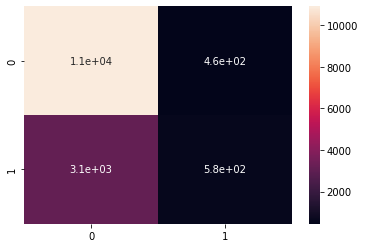

In [22]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)

In [23]:
df=pd.merge(test_df,train_df)

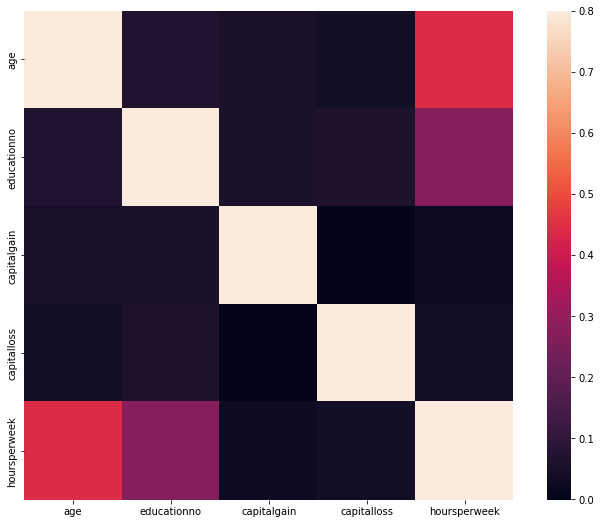

In [24]:
import seaborn as sns
import matplotlib.pyplot as pplt
#correlation matrix
corrmat = df.corr()
f, ax = pplt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);